<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_3_DATA_SCIENCE_PUC_RIO/blob/main/MVP3_PUC_Rio_(Fabio_Pojo_de_Almeida).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP Sprint 3: Engenharia de Dados

Trabalho realizado por Fabio Pojo de Almeida


Este √© um trabalho acad√™mico para fins de conclus√£o da 3¬™ (e √∫ltima) Sprint do Curso de Ci√™ncia de Dados da PUC-Rio.

Trabalho elaborado e baseado em dados e informa√ß√µes obtidas acerca da venda de Consoles Nintendo Switch, com base no pr√≥prio relat√≥rio da Nintendo (presente no link: https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx)

Mas, foi feita uma filtragem de dados e o resultado foi uma nova planilha no Excel, planilha esta que fora armazenada no Bucket da minha conta na AWS (salvo como p√∫blico para apenas leitura), que √© o foco principal do trabalho, no seguinte link: https://fabiopojo1987-mvp3-2025-puc-rio.s3.us-east-2.amazonaws.com/nintendo-switch-consolidated-sales-2017-2024.xlsx

1-Introdu√ß√£o

O Nintendo Switch, √© um console de videogame h√≠brido (pois ele √© port√°til e tamb√©m de mesa com o uso da dock), que se assemelha a um tablet. Este aparelho, que atualmente possui 3 vers√µes (Switch Standard, Switch OLED e Switch Lite) foi lan√ßado mundialmente em 03 de mar√ßo de 2017. Esse aparelho √© um dos mais vendidos no mundo. Mas, desta vez, irei colocar o n√∫mero de consoles, pois este projeto se trata sobre o n√∫mero de vendas de consoles de Nintendo Switch
O dataset utilizado nesse MVP foi montado a partir da combina√ß√£o de diversos dados baseados nos que a Nintendo divulga em rela√ß√£o √†s vendas de seus videogames a cada trimestre (dados estes presentes na p√°gina da pr√≥pria Nintendo, acess√≠vel em: http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html e https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx).


Estarei usando apenas dados divulgados oficialmente entre 2017 e 2024 (inseridos para fins de estat√≠stica e realiza√ß√£o deste trabalho), esta lista consiste especificamente de consoles da linha Nintendo Switch.

As vendas de software do Nintendo Switch t√™m sido impulsionadas por novos lan√ßamentos e vendas consistentes de t√≠tulos mais antigos.

Partindo dessa ideia, resolvi transformar os dados em gr√°ficos para poder analisar e demonstrar como se deu o crescimento das vendas entre os jogos mais populares para o referido console em apenas 7 anos.




Para isso, ap√≥s realizar o download do arquivo, fiz uma nova planilha (com o mesmo nome da original, por equ√≠voco, mas resolvi n√£o alterar para n√£o apresentar problemas) e fiz upload no bucket da AWS.

Utilizei-me do seguinte c√≥digo para gera√ß√£o dos gr√°ficos com base na planilha presente na nuvem. C√≥digo Python no Colab e com planilha baseada em nuvem da AWS:


Algumas melhorias feitas:
1.	Anota√ß√µes nos Gr√°ficos: Os valores de unidades vendidas s√£o exibidos diretamente sobre a coluna Y para maior precis√£o.
2.	Paletas de Cores: Utiliza√ß√£o de paletas de cores (tab10, viridis, Set2) para garantir contraste e uma visualiza√ß√£o mais limpa.
3.	Ajustes de Tamanho: Aumentado o tamanho dos gr√°ficos para garantir mais clareza.
4.	Grid: Apliquei uma grade mais discreta (linestyle='--'), para n√£o sobrecarregar visualmente e deixar mais limpo.
5.	Ajustes na Legenda: Aumentei a legibilidade dos textos na legenda.


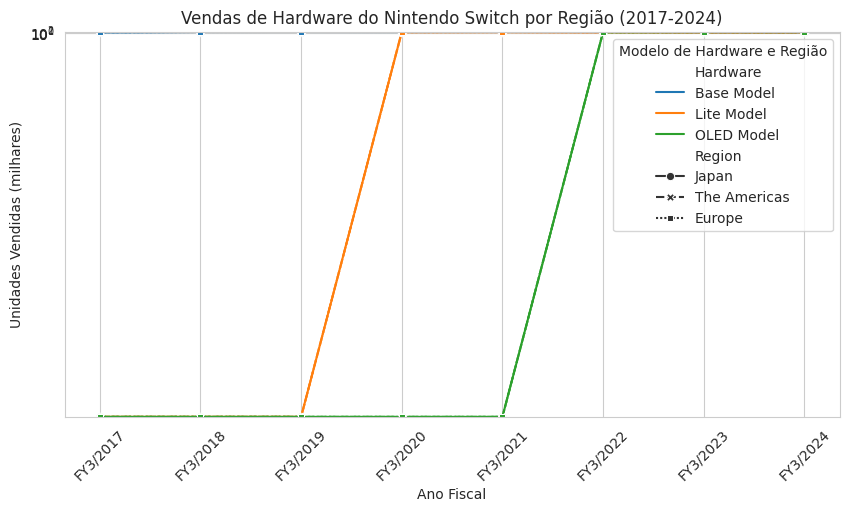

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a planilha no Bucket
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# Deixar os nomes das colunas limpos
df_hardware.columns = df_hardware.columns.str.strip()

# Ignorar as colunas totalmente vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# Converter para formato longo (melt)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# Limpar espa√ßos extras
df_melted['Region'] = df_melted['Region'].str.strip()
df_melted['Hardware'] = df_melted['Hardware'].str.strip()

# Substituir valores nulos (NaN) por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# Converter Ano Fiscal para string
df_melted['Fiscal Year'] = df_melted['Fiscal Year'].astype(str)

# **Filtrar apenas os dados de Hardware**
modelos_destacados = ['Total (all) Hardware', 'Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# ---- Gr√°fico de Hardware ----
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)

plt.title('Vendas de Hardware do Nintendo Switch por Regi√£o (2017-2024)')
plt.xlabel('Ano Fiscal')
plt.ylabel('Unidades Vendidas (milhares)')
plt.ylim(0, df_hardware_sales['Units Sold'].max() * 1.1)
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Hardware e Regi√£o')
plt.grid(True)
plt.show()


Pelo visto, o c√≥digo errou em alguns aspectos. Modelos que sequer existiam, foram plotados, uma corre√ß√£o foi necess√°ria

<Axes: xlabel='Fiscal Year', ylabel='Units Sold'>

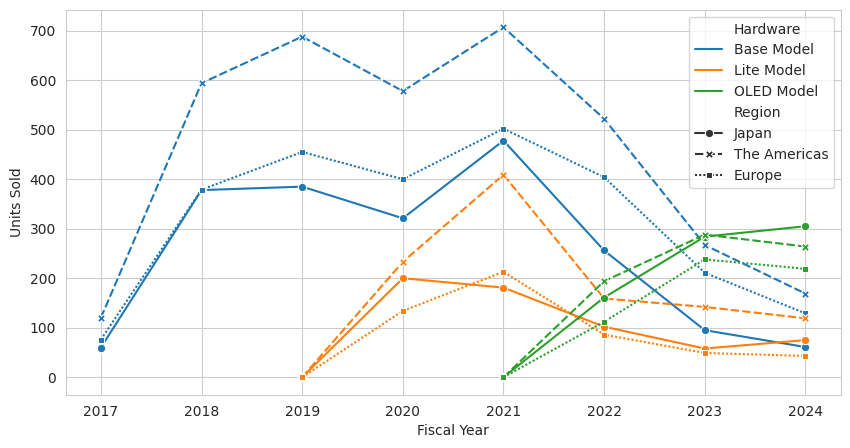

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Para extrair os anos corretamente

# Carregar a planilha corretamente
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# Limpar nomes das colunas
df_hardware.columns = df_hardware.columns.str.strip()

# Remover colunas totalmente vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# Converter para formato longo (melt)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# Limpar espa√ßos extras
df_melted['Region'] = df_melted['Region'].str.strip()
df_melted['Hardware'] = df_melted['Hardware'].str.strip()

# Substituir valores nulos (NaN) por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# **Corrigir os anos fiscais**
df_melted['Fiscal Year'] = df_melted['Fiscal Year'].apply(lambda x: int(re.search(r'\d{4}', x).group()) if pd.notna(x) else None)

# Filtrar apenas os dados de Hardware
modelos_destacados = ['Total (all) Hardware', 'Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# **Definir os anos de lan√ßamento corretos**
anos_lancamento = {
    'Base Model': 2017,
    'Lite Model': 2019,
    'OLED Model': 2021
}

# **Remover entradas onde o modelo ainda n√£o existia**
df_hardware_sales = df_hardware_sales[
    df_hardware_sales.apply(lambda row: row['Fiscal Year'] >= anos_lancamento.get(row['Hardware'], 2017), axis=1)
]

# ---- Gr√°fico de Hardware ----
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)

üîç Regi√µes antes de qualquer filtragem: [nan 'Japan' 'The Americas' 'Europe' 'Other' 'World Total']

üîç Amostra antes de filtrar regi√µes:
      Hardware        Region Fiscal Year  Units Sold
1   Base Model         Japan    FY3/2017        60.0
2   Base Model  The Americas    FY3/2017       120.0
3   Base Model        Europe    FY3/2017        76.0
4   Base Model         Other    FY3/2017        18.0
5   Base Model   World Total    FY3/2017       274.0
6   Lite Model         Japan    FY3/2017         0.0
7   Lite Model  The Americas    FY3/2017         0.0
8   Lite Model        Europe    FY3/2017         0.0
9   Lite Model         Other    FY3/2017         0.0
10  Lite Model   World Total    FY3/2017         0.0

üîç Regi√µes depois do filtro: ['Japan' 'The Americas' 'Europe']

üîç Amostra de The Americas:
      Hardware        Region Fiscal Year  Units Sold
2   Base Model  The Americas    FY3/2017       120.0
7   Lite Model  The Americas    FY3/2017         0.0
12  OLED Model  

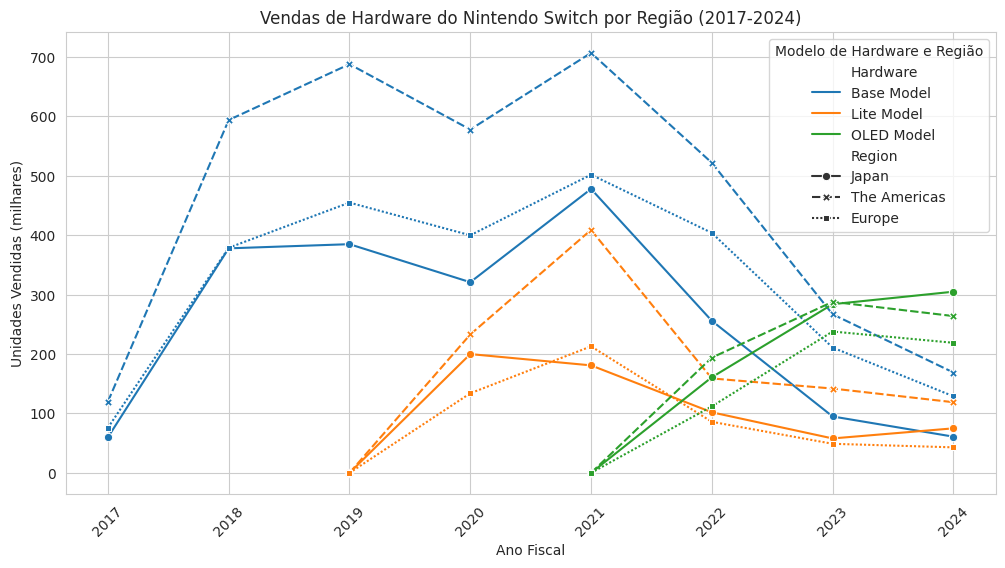

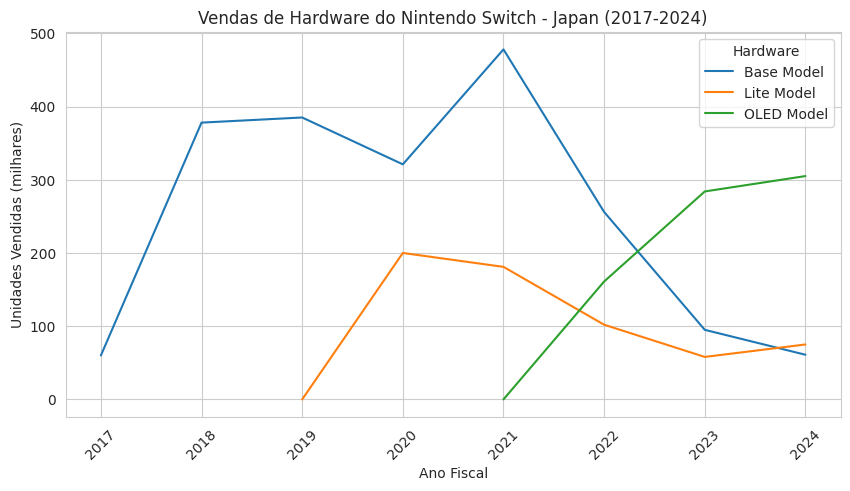

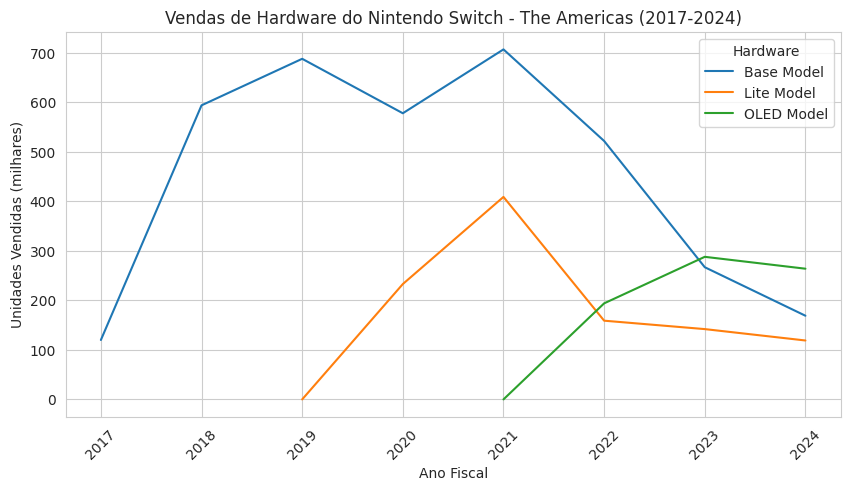

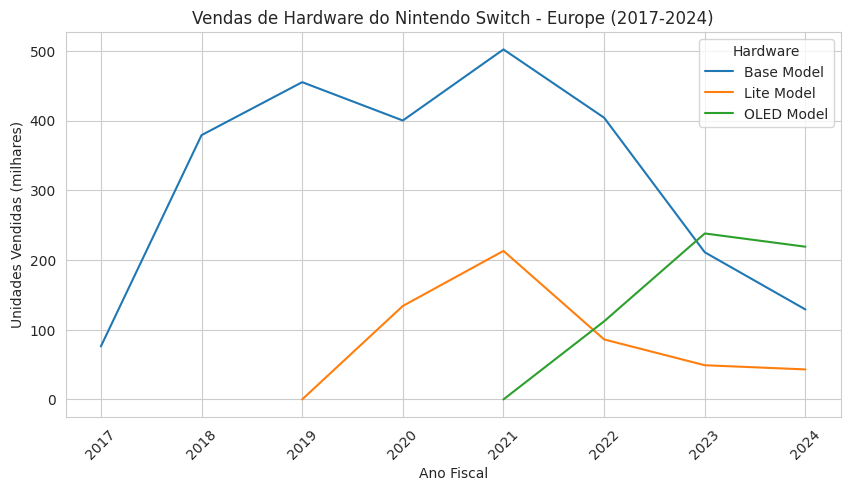

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# üìå 1. Carregar os dados
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# üìå 2. Limpar nomes das colunas
df_hardware.columns = df_hardware.columns.str.strip()

# üìå 3. Remover colunas vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# üìå 4. Converter para formato longo (unpivot)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# üìå 5. Remover espa√ßos extras dos nomes das regi√µes
df_melted['Region'] = df_melted['Region'].str.strip()

# üìå 6. Corrigir nomes das regi√µes para garantir que aparecem corretamente
df_melted['Region'] = df_melted['Region'].replace({
    'Americas': 'The Americas',
    'EU': 'Europe',
    'Total': 'World Total'
})

# üìå 7. Exibir regi√µes √∫nicas antes do filtro
print("üîç Regi√µes antes de qualquer filtragem:", df_melted['Region'].unique())

# üìå 8. Substituir valores NaN em "Units Sold" por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# üìå 9. Filtrar os modelos e regi√µes desejadas
modelos_destacados = ['Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]

# üìå 10. Exibir amostra ANTES da filtragem das regi√µes
print("\nüîç Amostra antes de filtrar regi√µes:")
print(df_hardware_sales.head(10))

# üìå 11. Aplicar filtro para as regi√µes
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# üìå 12. Exibir regi√µes depois do filtro
print("\nüîç Regi√µes depois do filtro:", df_hardware_sales['Region'].unique())

# üìå 13. Exibir amostra para 'The Americas' e 'Europe'
print("\nüîç Amostra de The Americas:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'The Americas'].head())

print("\nüîç Amostra de Europe:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'Europe'].head())

# üìå 14. Corrigir anos fiscais extraindo apenas os n√∫meros
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].apply(
    lambda x: re.search(r'\d{4}', x).group() if re.search(r'\d{4}', x) else None
)

# üìå 15. Remover anos inv√°lidos e converter para inteiro
df_hardware_sales = df_hardware_sales.dropna(subset=['Fiscal Year'])
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].astype(int)

# üìå 16. Definir os anos de lan√ßamento dos modelos para remover dados inv√°lidos
anos_lancamento = {
    'Base Model': 2017,
    'Lite Model': 2019,
    'OLED Model': 2021
}

# üìå 17. Remover entradas onde o modelo ainda n√£o existia
df_hardware_sales = df_hardware_sales[
    df_hardware_sales.apply(lambda row: row['Fiscal Year'] >= anos_lancamento.get(row['Hardware'], 2017), axis=1)
]

# üìå 18. Verificar se o DataFrame ainda tem dados ap√≥s a filtragem
print("\nüìä Tamanho final do DataFrame:", df_hardware_sales.shape)
print("\nüîç Amostra final do DataFrame:")
print(df_hardware_sales.head())

# üìå 19. Ajustar o estilo do gr√°fico
sns.set_style("whitegrid")

# üìå 20. Criar gr√°fico principal
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)
plt.title('Vendas de Hardware do Nintendo Switch por Regi√£o (2017-2024)')
plt.xlabel('Ano Fiscal')
plt.ylabel('Unidades Vendidas (milhares)')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Hardware e Regi√£o')
plt.grid(True)
plt.show()

# üìå 21. Criar gr√°ficos separados por regi√£o
for region in regioes_destacadas:
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=df_hardware_sales[df_hardware_sales['Region'] == region],
        x='Fiscal Year',
        y='Units Sold',
        hue='Hardware',
        markers=True
    )
    plt.title(f'Vendas de Hardware do Nintendo Switch - {region} (2017-2024)')
    plt.xlabel('Ano Fiscal')
    plt.ylabel('Unidades Vendidas (milhares)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [ ]:
# üìå 1. Mostrar todas as regi√µes presentes no DataFrame original
print("\nüîç Regi√µes antes de qualquer filtragem:", df_melted['Region'].unique())

# üìå 2. Mostrar os dados antes do filtro de regi√£o
print("\nüîç Amostra antes da filtragem de regi√µes:")
print(df_melted[df_melted['Region'] == 'The Americas'].head(10))

# üìå 3. Verificar se h√° dados NaN na coluna de vendas antes da filtragem
print("\nüìå Valores NaN antes da filtragem por regi√£o:")
print(df_melted[df_melted['Region'] == 'The Americas']['Units Sold'].isna().sum())

# üìå 4. Mostrar dados ap√≥s aplicar o filtro de Hardware
print("\nüîç Amostra depois da filtragem de hardware e antes da filtragem de regi√£o:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'The Americas'].head(10))

# üìå 5. Mostrar se ainda h√° dados depois da filtragem final
print("\nüìå Tamanho final do DataFrame ap√≥s todas as filtragens:", df_hardware_sales.shape)



üîç Regi√µes antes de qualquer filtragem: [nan 'Japan' 'The Americas' 'Europe' 'Other' 'World Total']

üîç Amostra antes da filtragem de regi√µes:
      Hardware        Region Fiscal Year  Units Sold
2   Base Model  The Americas    FY3/2017       120.0
7   Lite Model  The Americas    FY3/2017         0.0
12  OLED Model  The Americas    FY3/2017         0.0
18  Base Model  The Americas    FY3/2018       594.0
23  Lite Model  The Americas    FY3/2018         0.0
28  OLED Model  The Americas    FY3/2018         0.0
34  Base Model  The Americas    FY3/2019       688.0
39  Lite Model  The Americas    FY3/2019         0.0
44  OLED Model  The Americas    FY3/2019         0.0
50  Base Model  The Americas    FY3/2020       578.0

üìå Valores NaN antes da filtragem por regi√£o:
0

üîç Amostra depois da filtragem de hardware e antes da filtragem de regi√£o:
      Hardware        Region  Fiscal Year  Units Sold
2   Base Model  The Americas         2017       120.0
18  Base Model  The Americas

5-	 An√°lise dos gr√°ficos
As vendas do Nintendo Switch apresentaram varia√ß√µes ao longo dos anos, influenciadas por diversos fatores econ√¥micos, log√≠sticos e mercadol√≥gicos. A seguir, s√£o destacados alguns dos principais aspectos que afetaram essas varia√ß√µes.
5.1-  Escassez de componentes e problemas na cadeia de suprimentos
A pandemia de COVID-19 resultou em uma escassez global de semicondutores, impactando diretamente a produ√ß√£o de consoles, incluindo o Nintendo Switch.
No trimestre encerrado em junho de 2022, as vendas do console ca√≠ram 23% em rela√ß√£o ao mesmo per√≠odo do ano anterior, totalizando 3,43 milh√µes de unidades vendidas. A Nintendo atribuiu essa queda √† dificuldade na obten√ß√£o de componentes essenciais para a fabrica√ß√£o do console.
5.2-  Infla√ß√£o e diversifica√ß√£o das op√ß√µes de entretenimento
Em fevereiro de 2023, a Nintendo destacou que fatores como a infla√ß√£o e a amplia√ß√£o das op√ß√µes de entretenimento contribu√≠ram para a desacelera√ß√£o das vendas do Switch, especialmente nas Am√©ricas e na Europa. No Jap√£o, no entanto, o console continuou apresentando altas vendas.
O ent√£o presidente da Nintendo mencionou que o aumento dos pre√ßos e a concorr√™ncia com outros dispositivos, como o Xbox, PlayStation 4 e PlayStation 5, impactaram negativamente a demanda pelo console. Reduzindo a mesma.
Al√©m disso, foi anunciado o Nintendo Switch 2, com lan√ßamento previsto para 5 de junho de 2025, ao pre√ßo inicial de US$ 449,99 nos Estados Unidos. O novo console contar√° com melhorias como uma tela LCD de 7,9 polegadas, 256 GB de armazenamento interno e novos recursos de chat e v√≠deo. Analistas preveem que o Switch 2 manter√° uma demanda elevada, apesar dos desafios econ√¥micos e das tens√µes comerciais globais.
6-	 Conclus√£o
A realiza√ß√£o deste trabalho representou um grande desafio para mim, pois envolveu o aprendizado e a aplica√ß√£o de novas t√©cnicas para coleta, an√°lise e visualiza√ß√£o de dados.
T√©cnicas estas que ainda n√£o me havia ainda me familiarizado.
Apesar das dificuldades, foi poss√≠vel alcan√ßar 90% dos objetivos inicialmente planejados.
Ainda h√° espa√ßo para melhorias, visto que a an√°lise e a apresenta√ß√£o dos dados deste trabalho podem ser aprimoradas.
A necessidade do desenvolvimento de compet√™ncias nessa √°rea continuar√° sendo uma prioridade, com investimentos futuros em cursos e especializa√ß√µes para aprofundamento no tema.



 Refer√™ncias utilizadas para pesquisa e desenvolvimento do projeto

GLOBELIVE MEDIA. Nintendo Switch sales drop 33% in Japan due to component shortages. Dispon√≠vel em:
https://globelivemedia.com/gaming/nintendo-switch-sales-drop-33-in-japan-due-to-component-shortages/. Acesso em: 31 mar. 2025.
NINTENDO. Consolidated Sales Data. Dispon√≠vel em:
https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx. Acesso em: 31 mar. 2025.
NINTENDO. Financial Results and Sales Data. Dispon√≠vel em:
http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html Acesso em: 31 mar. 2025.
THE VERGE. Nintendo Switch Q1 2023 earnings: sales software and hardware down due to semiconductor shortage. Dispon√≠vel em:
https://www.theverge.com/2022/8/3/23290085/nintendo-switch-q1-2023-earnings-sales-software-hardware-down-semiconductor-shortage. Acesso em: 31 mar. 2025..
WALL STREET JOURNAL. Nintendo Switch 2 announced: features and launch date. Dispon√≠vel em:
https://www.wsj.com/business/media/nintendo-switch-2-announced-features-05a72dc0. Acesso em: 31 mar. 2025.

